In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import sys
sys.path.insert(0, '/content/gdrive/MyDrive/Colab Notebooks')

In [ ]:
import pytorch_optimizer as optim

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [ ]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [ ]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

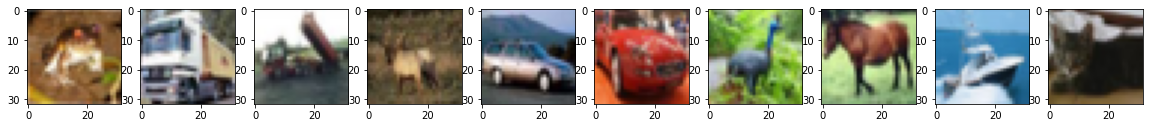

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [ ]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape

torch.Size([50000, 3, 32, 32])

In [31]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    #optimizer = torch.optim.SGD(net.parameters(), lr=5.0e-2)
    #optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    #optimizer = optim.PNMBelief(net.parameters(), lr=0.001)
    #optimizer = optim.YogiPNM(net.parameters())
    #optimizer = optim.AdaBelief(net.parameters())
    optimizer = optim.DiffGrad(net.parameters())
    #optimizer = optim.Yogi(net.parameters())
    
    batch_size = 200

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(20):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))
        
        if epoch == 12:
            optimizer = torch.optim.Adam(net.parameters(), lr=0.5e-4)

        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history

In [ ]:
accuracies = {}
losses = {}

In [ ]:
from torchvision.models import densenet121, DenseNet121_Weights
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

In [15]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
accuracies['densenet121+Adam'], losses['densenet121+Adam'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:39<00:00,  6.39it/s]


accuracy =  0.784500002861023



epoch  1


100%|██████████| 250/250 [00:31<00:00,  7.91it/s]


accuracy =  0.8041999936103821



epoch  2


100%|██████████| 250/250 [00:32<00:00,  7.71it/s]


accuracy =  0.8133999705314636



epoch  3


100%|██████████| 250/250 [00:31<00:00,  8.00it/s]


accuracy =  0.8233000040054321



epoch  4


100%|██████████| 250/250 [00:32<00:00,  7.72it/s]


accuracy =  0.8007999658584595



epoch  5


100%|██████████| 250/250 [00:33<00:00,  7.51it/s]


accuracy =  0.8247999548912048



epoch  6


100%|██████████| 250/250 [00:31<00:00,  7.88it/s]


accuracy =  0.7940999865531921



epoch  7


100%|██████████| 250/250 [00:32<00:00,  7.77it/s]


accuracy =  0.8290999531745911



epoch  8


100%|██████████| 250/250 [00:31<00:00,  7.87it/s]


accuracy =  0.8113999962806702



epoch  9


100%|██████████| 250/250 [00:31<00:00,  7.86it/s]


accuracy =  0.824999988079071



epoch  10


100%|██████████| 250/250 [00:32<00:00,  7.70it/s]


accuracy =  0.8382999897003174



epoch  11


100%|██████████| 250/250 [00:31<00:00,  7.99it/s]


accuracy =  0.8362999558448792



epoch  12


100%|██████████| 250/250 [00:31<00:00,  7.84it/s]


accuracy =  0.8707000017166138



epoch  13


100%|██████████| 250/250 [00:32<00:00,  7.74it/s]


accuracy =  0.873199999332428



epoch  14


100%|██████████| 250/250 [00:30<00:00,  8.08it/s]


accuracy =  0.8730999827384949



epoch  15


100%|██████████| 250/250 [00:32<00:00,  7.81it/s]


accuracy =  0.873699963092804



epoch  16


100%|██████████| 250/250 [00:30<00:00,  8.08it/s]


accuracy =  0.8748999834060669



epoch  17


  7%|▋         | 18/250 [00:02<00:33,  7.02it/s]


KeyboardInterrupt: ignored

In [21]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
accuracies['densenet121+PNMBelief'], losses['densenet121+PNMBelief'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:38<00:00,  6.51it/s]


accuracy =  0.8064999580383301



epoch  1


100%|██████████| 250/250 [00:40<00:00,  6.24it/s]


accuracy =  0.8113999962806702



epoch  2


100%|██████████| 250/250 [00:38<00:00,  6.55it/s]


accuracy =  0.8412999510765076



epoch  3


100%|██████████| 250/250 [00:37<00:00,  6.59it/s]


accuracy =  0.8314999938011169



epoch  4


100%|██████████| 250/250 [00:38<00:00,  6.56it/s]


accuracy =  0.8118000030517578



epoch  5


100%|██████████| 250/250 [00:37<00:00,  6.58it/s]


accuracy =  0.8378999829292297



epoch  6


100%|██████████| 250/250 [00:38<00:00,  6.54it/s]


accuracy =  0.8312999606132507



epoch  7


100%|██████████| 250/250 [00:38<00:00,  6.58it/s]


accuracy =  0.8385999798774719



epoch  8


100%|██████████| 250/250 [00:39<00:00,  6.25it/s]


accuracy =  0.842799961566925



epoch  9


100%|██████████| 250/250 [00:38<00:00,  6.56it/s]


accuracy =  0.8348000049591064



epoch  10


100%|██████████| 250/250 [00:38<00:00,  6.51it/s]


accuracy =  0.8427000045776367



epoch  11


100%|██████████| 250/250 [00:38<00:00,  6.53it/s]


accuracy =  0.8438000082969666



epoch  12


100%|██████████| 250/250 [00:33<00:00,  7.57it/s]


accuracy =  0.8718000054359436



epoch  13


100%|██████████| 250/250 [00:34<00:00,  7.32it/s]


accuracy =  0.8707999587059021



epoch  14


100%|██████████| 250/250 [00:33<00:00,  7.45it/s]


accuracy =  0.8727999925613403



epoch  15


100%|██████████| 250/250 [00:33<00:00,  7.39it/s]


accuracy =  0.8751999735832214



epoch  16


100%|██████████| 250/250 [00:33<00:00,  7.43it/s]


accuracy =  0.8737999796867371



epoch  17


100%|██████████| 250/250 [00:32<00:00,  7.64it/s]


accuracy =  0.8739999532699585



epoch  18


100%|██████████| 250/250 [00:33<00:00,  7.41it/s]


accuracy =  0.8718000054359436



epoch  19


100%|██████████| 250/250 [00:32<00:00,  7.67it/s]


accuracy =  0.8710999488830566





In [26]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
accuracies['densenet121+Yogi'], losses['densenet121+Yogi'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:35<00:00,  7.13it/s]


accuracy =  0.7394999861717224



epoch  1


100%|██████████| 250/250 [00:32<00:00,  7.68it/s]


accuracy =  0.8032000064849854



epoch  2


100%|██████████| 250/250 [00:32<00:00,  7.64it/s]


accuracy =  0.821899950504303



epoch  3


100%|██████████| 250/250 [00:33<00:00,  7.57it/s]


accuracy =  0.8380999565124512



epoch  4


100%|██████████| 250/250 [00:32<00:00,  7.68it/s]


accuracy =  0.824999988079071



epoch  5


100%|██████████| 250/250 [00:33<00:00,  7.56it/s]


accuracy =  0.8352999687194824



epoch  6


100%|██████████| 250/250 [00:32<00:00,  7.76it/s]


accuracy =  0.8251999616622925



epoch  7


100%|██████████| 250/250 [00:33<00:00,  7.55it/s]


accuracy =  0.8277999758720398



epoch  8


100%|██████████| 250/250 [00:33<00:00,  7.48it/s]


accuracy =  0.8198999762535095



epoch  9


100%|██████████| 250/250 [00:33<00:00,  7.52it/s]


accuracy =  0.8300999999046326



epoch  10


100%|██████████| 250/250 [00:32<00:00,  7.71it/s]


accuracy =  0.8417999744415283



epoch  11


100%|██████████| 250/250 [00:32<00:00,  7.63it/s]


accuracy =  0.8454999923706055



epoch  12


100%|██████████| 250/250 [00:32<00:00,  7.59it/s]


accuracy =  0.8662999868392944



epoch  13


100%|██████████| 250/250 [00:32<00:00,  7.70it/s]


accuracy =  0.8682999610900879



epoch  14


100%|██████████| 250/250 [00:33<00:00,  7.53it/s]


accuracy =  0.8704999685287476



epoch  15


100%|██████████| 250/250 [00:31<00:00,  7.82it/s]


accuracy =  0.8666999936103821



epoch  16


100%|██████████| 250/250 [00:33<00:00,  7.39it/s]


accuracy =  0.8689999580383301



epoch  17


100%|██████████| 250/250 [00:32<00:00,  7.78it/s]


accuracy =  0.8654999732971191



epoch  18


  5%|▌         | 13/250 [00:02<00:37,  6.39it/s]


KeyboardInterrupt: ignored

In [32]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
accuracies['densenet121+DiffGrad'], losses['densenet121+DiffGrad'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 250/250 [00:40<00:00,  6.13it/s]


accuracy =  0.7975999712944031



epoch  1


100%|██████████| 250/250 [00:43<00:00,  5.70it/s]


accuracy =  0.8245999813079834



epoch  2


100%|██████████| 250/250 [00:41<00:00,  6.04it/s]


accuracy =  0.8369999527931213



epoch  3


100%|██████████| 250/250 [00:41<00:00,  6.05it/s]


accuracy =  0.8398999571800232



epoch  4


100%|██████████| 250/250 [00:41<00:00,  6.02it/s]


accuracy =  0.8348000049591064



epoch  5


100%|██████████| 250/250 [00:41<00:00,  6.08it/s]


accuracy =  0.8344999551773071



epoch  6


100%|██████████| 250/250 [00:41<00:00,  5.97it/s]


accuracy =  0.8355000019073486



epoch  7


100%|██████████| 250/250 [00:42<00:00,  5.93it/s]


accuracy =  0.8102999925613403



epoch  8


100%|██████████| 250/250 [00:40<00:00,  6.13it/s]


accuracy =  0.8212999701499939



epoch  9


100%|██████████| 250/250 [00:40<00:00,  6.20it/s]


accuracy =  0.8299999833106995



epoch  10


100%|██████████| 250/250 [00:40<00:00,  6.19it/s]


accuracy =  0.843999981880188



epoch  11


100%|██████████| 250/250 [00:40<00:00,  6.18it/s]


accuracy =  0.849399983882904



epoch  12


100%|██████████| 250/250 [00:32<00:00,  7.60it/s]


accuracy =  0.8677999973297119



epoch  13


100%|██████████| 250/250 [00:31<00:00,  7.87it/s]


accuracy =  0.8689999580383301



epoch  14


100%|██████████| 250/250 [00:33<00:00,  7.41it/s]


accuracy =  0.8705999851226807



epoch  15


100%|██████████| 250/250 [00:31<00:00,  7.83it/s]


accuracy =  0.8689000010490417



epoch  16


  6%|▌         | 15/250 [00:02<00:38,  6.11it/s]


KeyboardInterrupt: ignored

In [ ]:
model = densenet121(weights=DenseNet121_Weights.IMAGENET1K_V1)
accuracies['densenet121+YogiPNM'], losses['densenet121+YogiPNM'] = \
    train(model, X_train, y_train, X_test, y_test)

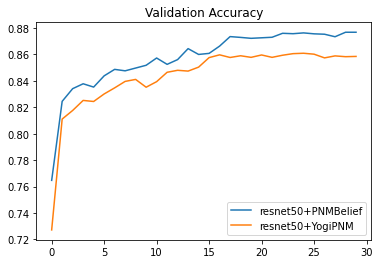

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

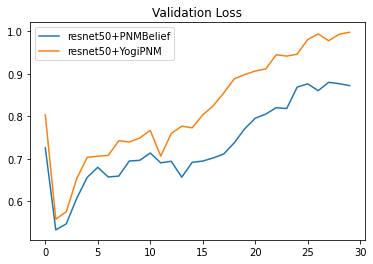

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D # resnet18+PNMBelief

,0,1,2,3,4,5,6,7,8,9
0,879,12,42,15,14,12,8,11,34,19
1,12,906,5,8,2,1,4,2,16,43
2,24,6,793,55,35,39,27,11,7,4
3,14,3,23,635,35,103,19,21,8,6
4,9,0,47,53,838,30,34,28,1,2
5,1,2,28,151,20,753,12,29,2,2
6,3,5,33,39,12,15,888,3,3,3
7,14,3,20,26,30,34,3,882,1,7
8,29,10,5,9,11,4,3,4,917,13
9,15,53,4,9,3,9,2,9,11,901


In [ ]:
D # resnet18

,0,1,2,3,4,5,6,7,8,9
0,878,16,36,22,4,8,8,5,33,15
1,10,905,1,6,1,2,3,3,11,45
2,20,0,817,43,37,32,27,16,11,8
3,9,5,32,693,45,138,49,32,7,8
4,9,1,40,44,822,27,28,18,1,3
5,9,5,33,124,32,746,11,48,3,1
6,4,4,22,27,21,10,867,4,3,3
7,7,1,14,26,30,30,2,861,1,6
8,36,18,3,7,6,3,3,4,916,28
9,18,45,2,8,2,4,2,9,14,883


In [16]:
APreds = pd.DataFrame()

In [33]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = []
model.eval()
with torch.no_grad():
            test_preds = model.forward(X_test)

In [18]:
APreds['Adam'] = test_preds.argmax(dim=1).tolist()

In [23]:
APreds['PNMBelief'] = test_preds.argmax(dim=1).tolist()

In [28]:
APreds['Yogi'] = test_preds.argmax(dim=1).tolist()

In [34]:
APreds['DiffGrad'] = test_preds.argmax(dim=1).tolist()

In [35]:
APreds

,Adam,PNMBelief,Yogi,DiffGrad
0,3,3,3,3
1,8,1,8,8
2,1,8,8,8
3,0,0,0,0
4,6,6,6,6
...,...,...,...,...
9995,8,8,8,3
9996,3,3,3,3
9997,5,5,5,5
9998,1,1,0,1


In [ ]:
APreds = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_densenet.csv')

In [43]:
APreds.to_csv('/content/gdrive/MyDrive/Colab Notebooks/ansambl_densenet.csv')

In [ ]:
APreds = APreds.drop(['Unnamed: 0'], axis=1)

In [42]:
APreds

,Adam,PNMBelief,Yogi,DiffGrad
0,3,3,3,3
1,8,1,8,8
2,1,8,8,8
3,0,0,0,0
4,6,6,6,6
...,...,...,...,...
9995,8,8,8,3
9996,3,3,3,3
9997,5,5,5,5
9998,1,1,0,1


In [37]:
data = np.zeros((10000,10), dtype=int)
ARes = pd.DataFrame(data)

In [38]:
for i in range(10000):
    for j in range(4):
        if j == 0:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8749
        if j == 1:
            ARes.iloc[i, APreds.iloc[i, j]%10] += 0.8718
        if j == 2:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.8655
        if j == 3:
            ARes.iloc[i, APreds.iloc[i, j]] += 0.87

In [39]:
anslist = ARes.idxmax(axis=1)

In [40]:
accuracy = (torch.tensor(anslist).to(device) == y_test).float().mean().item()

In [41]:
accuracy

0.8933999538421631